# Table of Contents
- [Introduction](#Introduction)
- [Data Cleansing](#Data-Cleansing)
- [Data Visualization](#Data-Visualization)
- [Model Training and Evaluation](#model-training-and-evaluation)

#Introduction 

Machine Learning in Python with the autompg-dataset
In this analysis, I use machine learning to predict the mpg for the next 10 rows of cars in the auto-mpg dataset. 
author: Nathaniel Cekay

In [1]:
import os
import csv
import pickle
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.image as mpimg


In [2]:
np.random.seed(42)

In [3]:
auto_mpg = pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv", na_values='?')

In [4]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#Data-Cleansing

In [6]:
#dropping missing values 
auto_mpg = auto_mpg.dropna(axis=0)

In [7]:
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
# converting 'Weight' from float to int
auto_mpg['mpg'] = auto_mpg['mpg'].astype(int)
auto_mpg['displacement'] = auto_mpg['displacement'].astype(int)
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype(int)
auto_mpg['acceleration'] = auto_mpg['acceleration'].astype(int)

# displaying the datatypes
display(auto_mpg.dtypes)

mpg              int64
cylinders        int64
displacement     int64
horsepower       int64
weight           int64
acceleration     int64
model year       int64
origin           int64
car name        object
dtype: object

#Data-Visualization

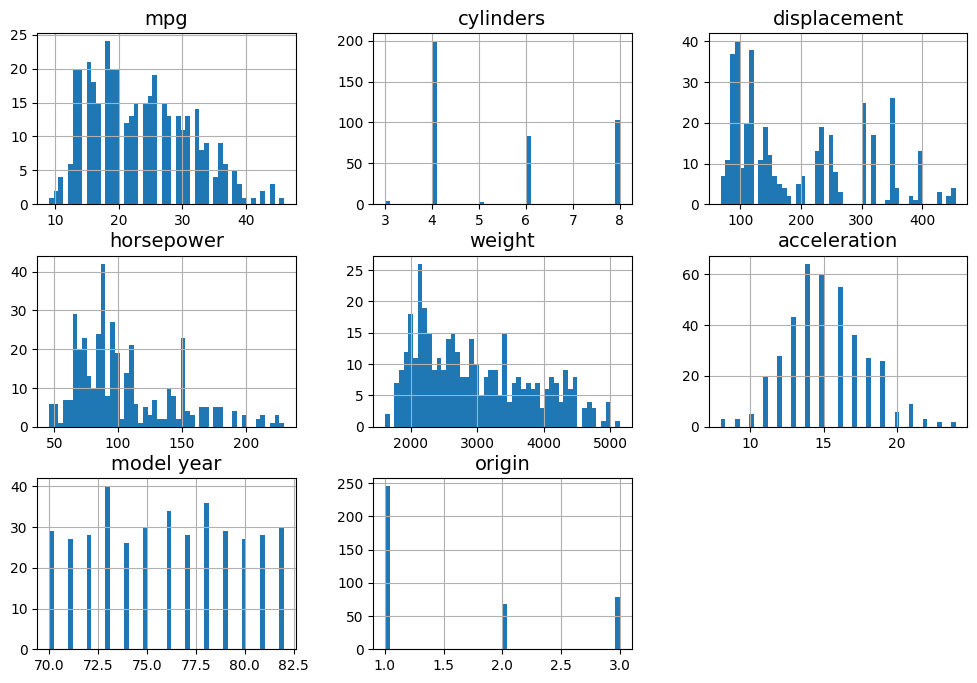

In [9]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

auto_mpg.hist(bins=50, figsize=(12, 8))
plt.show()

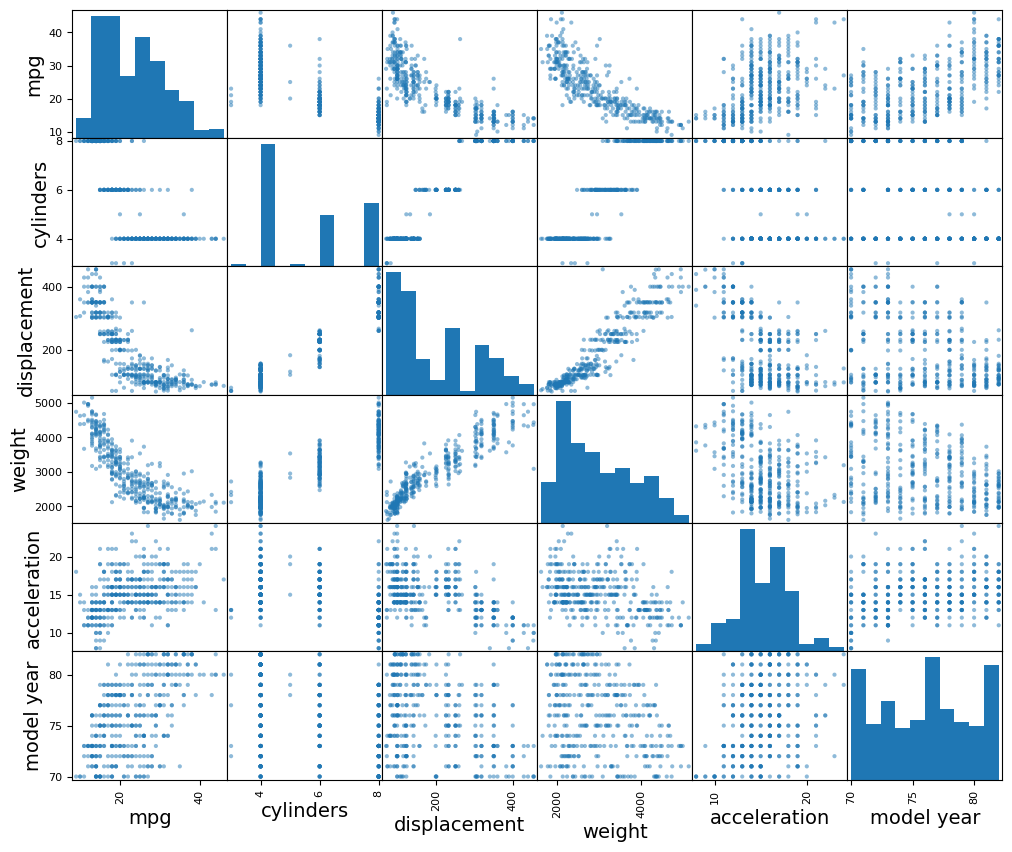

In [10]:
# plot every numerical attribute against every other numerical attribute
attributes = ["mpg", "cylinders", "displacement", "weight",
              "acceleration", "model year"]


scatter_matrix(auto_mpg[attributes], figsize=(12, 10))
plt.show()

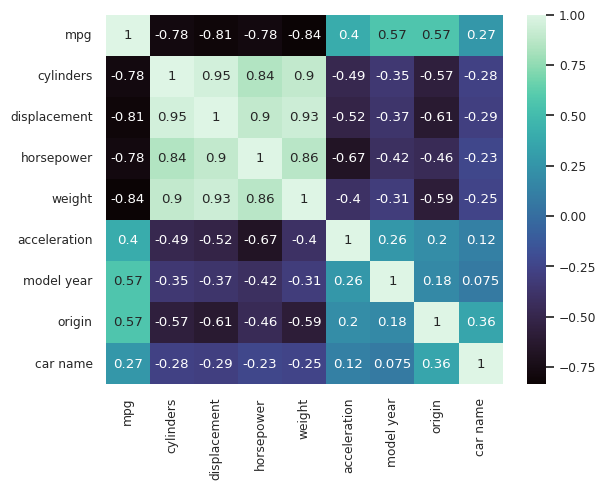

In [11]:
sns.set(font_scale=0.8)

hm_auto_mpg = auto_mpg.copy()

cat_col = hm_auto_mpg.select_dtypes(include = ['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in cat_col :
    hm_auto_mpg[col] = label_encoder.fit_transform(auto_mpg[col])

###Confusion Matrix 
cm = sns.heatmap(hm_auto_mpg.corr(), annot = True, cmap = 'mako')
plt.show()

In [12]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int64 
 1   cylinders     392 non-null    int64 
 2   displacement  392 non-null    int64 
 3   horsepower    392 non-null    int64 
 4   weight        392 non-null    int64 
 5   acceleration  392 non-null    int64 
 6   model year    392 non-null    int64 
 7   origin        392 non-null    int64 
 8   car name      392 non-null    object
dtypes: int64(8), object(1)
memory usage: 30.6+ KB


#model-training-and-evaluation

In [13]:
X = auto_mpg[['cylinders', 'weight', 'horsepower', 'acceleration', 'displacement', 'horsepower', 'model year']]  
y = auto_mpg["mpg"]

X = auto_mpg[['cylinders', 'weight', 'displacement', 'horsepower']]  
y = auto_mpg["mpg"]

In [14]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [16]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
train_predictions = model_lr.predict(X_train_scaled)
val_predictions = model_lr.predict(X_val_scaled)
test_predictions = model_lr.predict(X_test_scaled)

In [18]:
train_rmse_dt = mean_squared_error(y_train, train_predictions, squared=False)
val_rmse_dt = mean_squared_error(y_val, val_predictions, squared=False)
test_rmse_dt = mean_squared_error(y_test, test_predictions, squared=False)

train_r2_lr = r2_score(y_train, train_predictions)
val_r2_lr = r2_score(y_val, val_predictions)
test_r2_lr = r2_score(y_test, test_predictions)

print("Scores LinearRegression")
print("Train RMSE:", train_rmse_dt, "| Train R-squared:", train_r2_lr)
print("Validation RMSE:", val_rmse_dt, "| Validation R-squared:", val_r2_lr)
print("Test RMSE:", test_rmse_dt, "| Test R-squared:", test_r2_lr)

Scores LinearRegression
Train RMSE: 3.5927728247968767 | Train R-squared: 0.8070371803769278
Validation RMSE: 3.067287073816418 | Validation R-squared: 0.7999601799923373
Test RMSE: 3.245101551944977 | Test R-squared: 0.7933075467544699


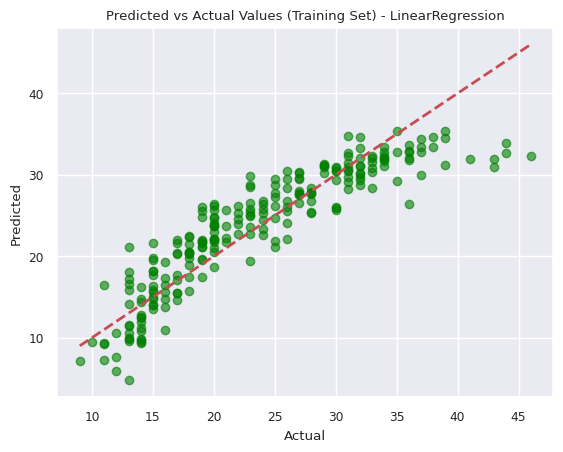

In [19]:
plt.scatter(y_train, train_predictions, color='green', alpha=0.6)  # Using train_predictions 
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  
plt.title("Predicted vs Actual Values (Training Set) - LinearRegression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

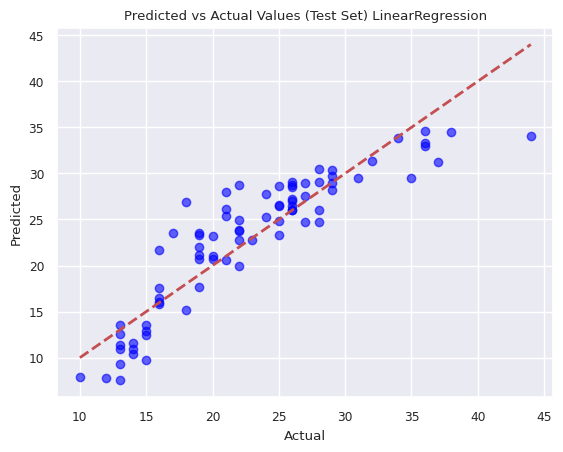

In [20]:
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6)  # Using test_predictions 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  
plt.title("Predicted vs Actual Values (Test Set) LinearRegression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

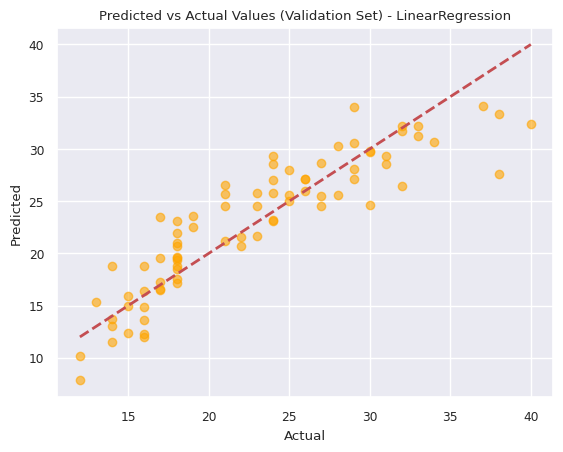

In [21]:
plt.scatter(y_val, val_predictions, color='orange', alpha=0.6)  # Using validation predictions
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  
plt.title("Predicted vs Actual Values (Validation Set) - LinearRegression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Text(0.5, 1.0, 'Predicted vs Actual Values (All Sets) - LinearRegression')

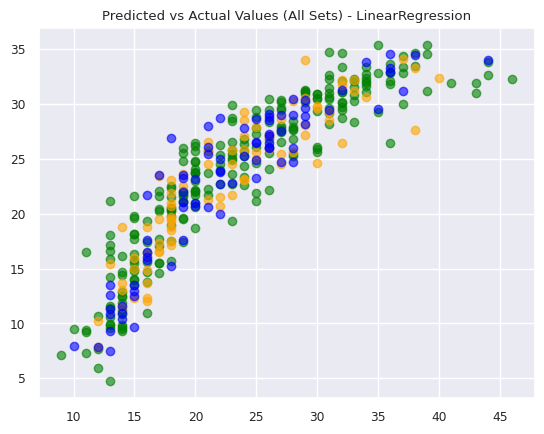

In [22]:
plt.scatter(y_train, train_predictions, color='green', alpha=0.6)
plt.scatter(y_val, val_predictions, color='orange', alpha=0.6)
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6)
plt.title("Predicted vs Actual Values (All Sets) - LinearRegression")

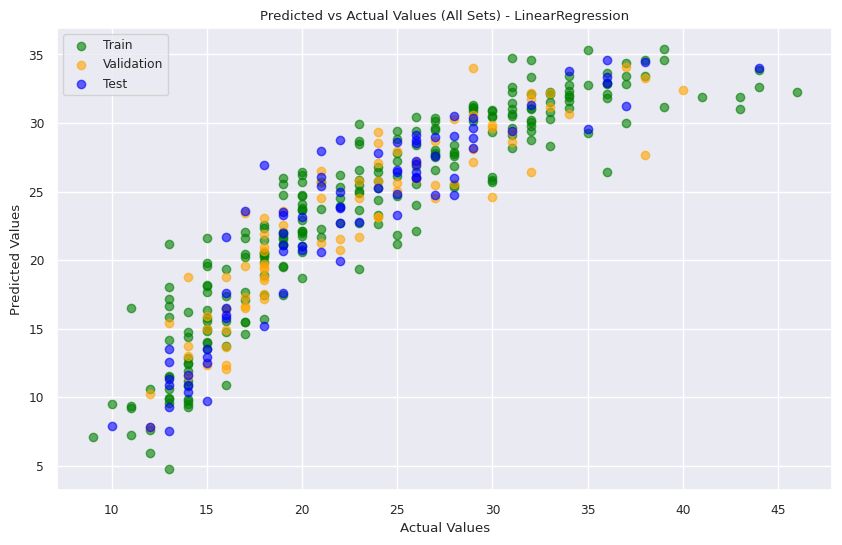

Plot saved to predicted_vs_actual_LinearRegression.png


In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='green', alpha=0.6, label='Train')
plt.scatter(y_val, val_predictions, color='orange', alpha=0.6, label='Validation')
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6, label='Test')
plt.title("Predicted vs Actual Values (All Sets) - LinearRegression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)


plot_filename = "predicted_vs_actual_LinearRegression.png"
plt.savefig(plot_filename)
plt.show()

print(f"Plot saved to {plot_filename}")

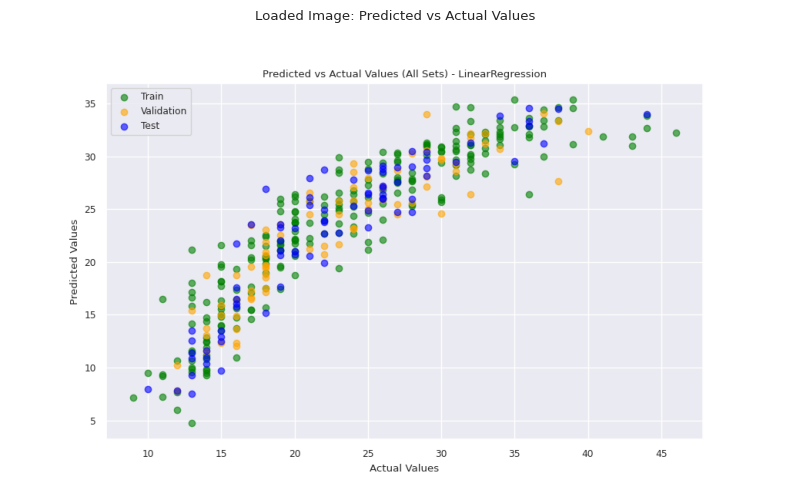

In [24]:
image_filename = 'predicted_vs_actual_LinearRegression.png'
img = mpimg.imread(image_filename)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axes if not needed
plt.title("Loaded Image: Predicted vs Actual Values")
plt.show()

In [25]:
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
model_rf.fit(X_train_scaled, y_train.values.ravel())

RandomForestRegressor(n_estimators=10, random_state=42)

In [26]:
train_predictions = model_rf.predict(X_train_scaled)
val_predictions = model_rf.predict(X_val_scaled)
test_predictions = model_rf.predict(X_test_scaled)

In [27]:
train_rmse_rf = mean_squared_error(y_train, train_predictions, squared=False)
val_rmse_rf = mean_squared_error(y_val, val_predictions, squared=False)
test_rmse_rf = mean_squared_error(y_test, test_predictions, squared=False)

train_r2_rf = r2_score(y_train, train_predictions)
val_r2_rf = r2_score(y_val, val_predictions)
test_r2_rf = r2_score(y_test, test_predictions)

scores_rf = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test"],
    "RMSE": [train_rmse_rf, val_rmse_rf, test_rmse_rf],
    "R-squared": [train_r2_rf, val_r2_rf, test_r2_rf]
})

print("Scores RandomForestRegressor")
print(scores_rf)

Scores RandomForestRegressor
      Dataset      RMSE  R-squared
0       Train  1.307369   0.974449
1  Validation  3.249713   0.775458
2        Test  2.459388   0.881280


Text(0.5, 1.0, 'Predicted vs Actual Values (All Sets) - RandomForestRegressor')

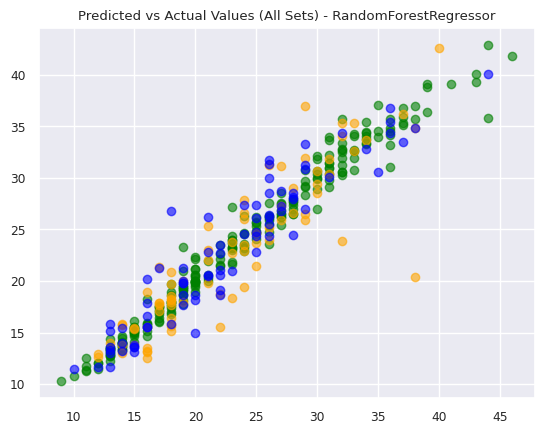

In [28]:
plt.scatter(y_train, train_predictions, color='green', alpha=0.6)
plt.scatter(y_val, val_predictions, color='orange', alpha=0.6)
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6)
plt.title("Predicted vs Actual Values (All Sets) - RandomForestRegressor")

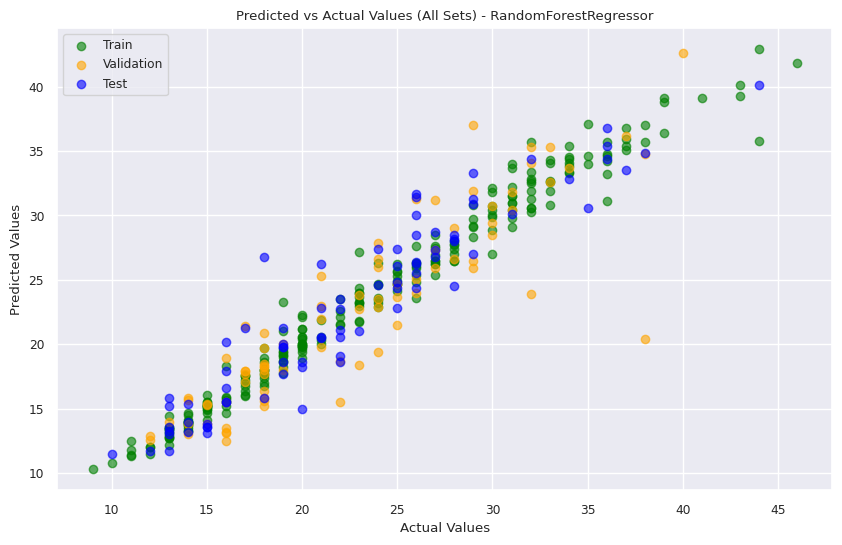

Plot saved to predicted_vs_actual_random_forest.png


In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='green', alpha=0.6, label='Train')
plt.scatter(y_val, val_predictions, color='orange', alpha=0.6, label='Validation')
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6, label='Test')
plt.title("Predicted vs Actual Values (All Sets) - RandomForestRegressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)


plot_filename = "predicted_vs_actual_random_forest.png"
plt.savefig(plot_filename)
plt.show()

print(f"Plot saved to {plot_filename}")

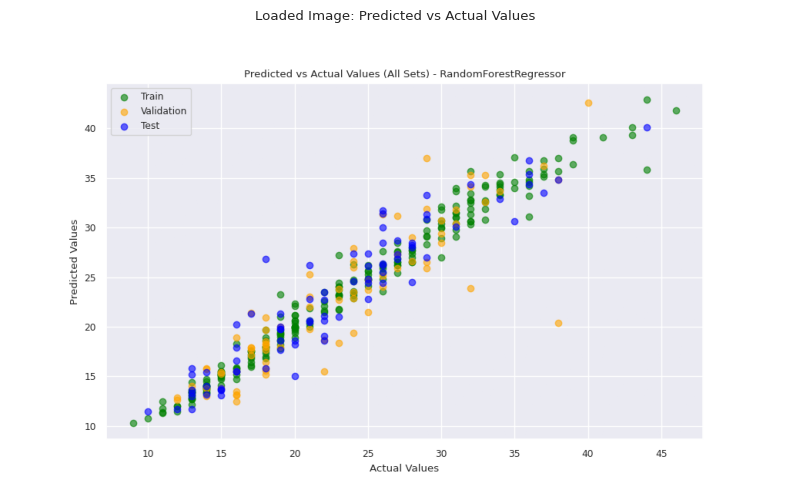

In [30]:
image_filename = 'predicted_vs_actual_random_forest.png'
img = mpimg.imread(image_filename)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axes if not needed
plt.title("Loaded Image: Predicted vs Actual Values")
plt.show()

In [31]:
model_dt = DecisionTreeRegressor(random_state=42) 
model_dt.fit(X_train_scaled, y_train) 

DecisionTreeRegressor(random_state=42)

In [32]:
train_predictions = model_dt.predict(X_train_scaled)
val_predictions = model_dt.predict(X_val_scaled)
test_predictions = model_dt.predict(X_test_scaled)

In [33]:
train_rmse_dt = mean_squared_error(y_train, train_predictions, squared=False)
val_rmse_dt = mean_squared_error(y_val, val_predictions, squared=False)
test_rmse_dt = mean_squared_error(y_test, test_predictions, squared=False)

train_r2_dt = r2_score(y_train, train_predictions)
val_r2_dt = r2_score(y_val, val_predictions)
test_r2_dt = r2_score(y_test, test_predictions)

scores_dt = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test"],
    "RMSE": [train_rmse_dt, val_rmse_dt, test_rmse_dt],
    "R-squared": [train_r2_dt, val_r2_dt, test_r2_dt]
})

print("Scores DecisionTreeRegressor")
print(scores_dt)

Scores DecisionTreeRegressor
      Dataset      RMSE  R-squared
0       Train  0.277350   0.998850
1  Validation  4.326837   0.601940
2        Test  3.347018   0.780121


In [34]:
train_rmse_dt = mean_squared_error(y_train, train_predictions, squared=False)
val_rmse_dt = mean_squared_error(y_val, val_predictions, squared=False)
test_rmse_dt = mean_squared_error(y_test, test_predictions, squared=False)

train_r2_dt = r2_score(y_train, train_predictions)
val_r2_dt = r2_score(y_val, val_predictions)
test_r2_dt = r2_score(y_test, test_predictions)

print("Scores DecisionTreeRegressor")
print("Train RMSE:", train_rmse_dt, "| Train R-squared:", train_r2_dt)
print("Validation RMSE:", val_rmse_dt, "| Validation R-squared:", val_r2_dt)
print("Test RMSE:", test_rmse_dt, "| Test R-squared:", test_r2_dt)

Scores DecisionTreeRegressor
Train RMSE: 0.2773500981126146 | Train R-squared: 0.9988500716794113
Validation RMSE: 4.326837065032813 | Validation R-squared: 0.6019398622268555
Test RMSE: 3.347018321666259 | Test R-squared: 0.7801207661100104


Text(0.5, 1.0, 'Predicted vs Actual Values (All Sets) - DecisionTreeRegressor')

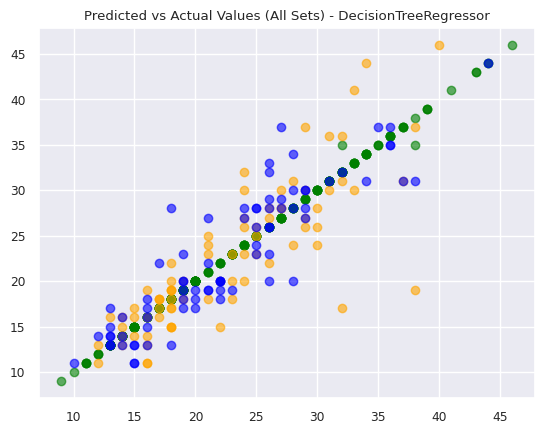

In [35]:
plt.scatter(y_train, train_predictions, color='green', alpha=0.6)
plt.scatter(y_val, val_predictions, color='orange', alpha=0.6)
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6)
plt.title("Predicted vs Actual Values (All Sets) - DecisionTreeRegressor")

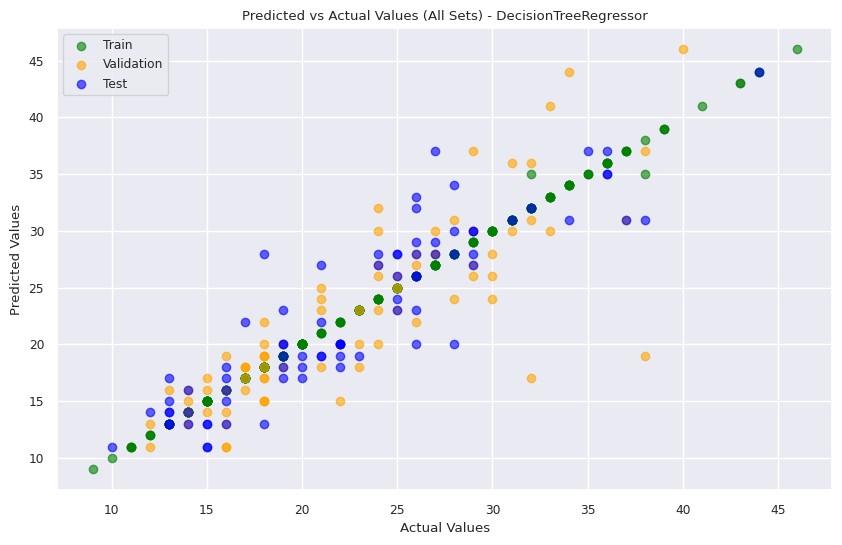

Plot saved to predicted_vs_actual_DecisionTreeRegressor.png


In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='green', alpha=0.6, label='Train')
plt.scatter(y_val, val_predictions, color='orange', alpha=0.6, label='Validation')
plt.scatter(y_test, test_predictions, color='blue', alpha=0.6, label='Test')
plt.title("Predicted vs Actual Values (All Sets) - DecisionTreeRegressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)


plot_filename = "predicted_vs_actual_DecisionTreeRegressor.png"
plt.savefig(plot_filename)
plt.show()

print(f"Plot saved to {plot_filename}")

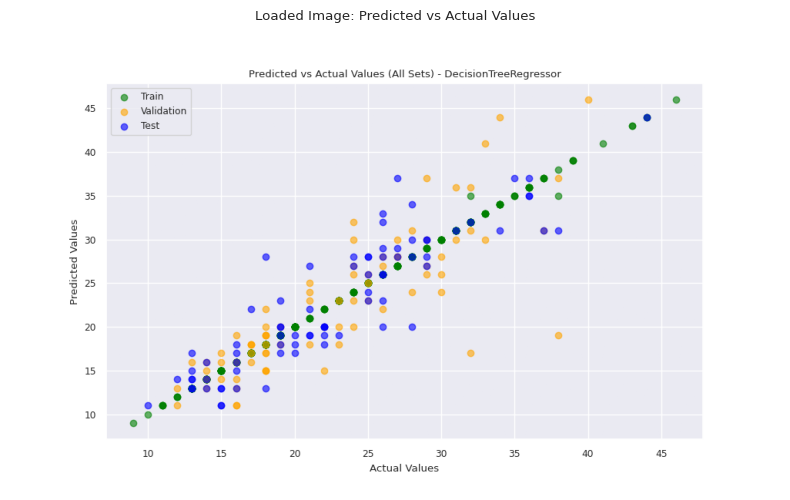

In [37]:
image_filename = 'predicted_vs_actual_DecisionTreeRegressor.png'
img = mpimg.imread(image_filename)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axes if not needed
plt.title("Loaded Image: Predicted vs Actual Values")
plt.show()

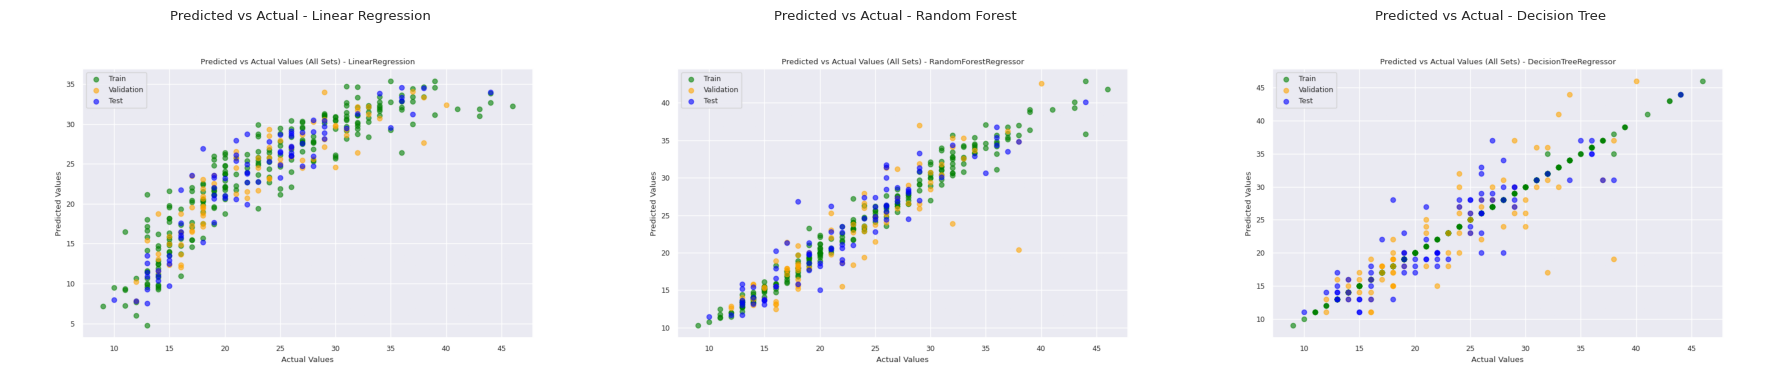

In [38]:
lr_image_filename = 'predicted_vs_actual_LinearRegression.png'
rf_image_filename = 'predicted_vs_actual_random_forest.png'
dt_image_filename = 'predicted_vs_actual_DecisionTreeRegressor.png'

lr_img = mpimg.imread(lr_image_filename)
rf_img = mpimg.imread(rf_image_filename)
dt_img = mpimg.imread(dt_image_filename)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(lr_img)
plt.axis('off')  
plt.title("Predicted vs Actual - Linear Regression")

plt.subplot(1, 3, 2)
plt.imshow(rf_img)
plt.axis('off') 
plt.title("Predicted vs Actual - Random Forest")

plt.subplot(1, 3, 3)
plt.imshow(dt_img)
plt.axis('off')  
plt.title("Predicted vs Actual - Decision Tree")

plt.tight_layout()
plt.show()

In [39]:
scores_df = pd.DataFrame({
    "Model": ["DecisionTree", "RandomForest", "LinearRegression"],
    "Train R²": [train_r2_dt, train_r2_rf, train_r2_lr],
    "Validation R²": [val_r2_dt, val_r2_rf, val_r2_lr],
    "Test R²": [test_r2_dt, test_r2_rf, test_r2_lr]
})

# Display the DataFrame
print("R-squared Scores for All Models")
print(scores_df)

R-squared Scores for All Models
              Model  Train R²  Validation R²   Test R²
0      DecisionTree  0.998850       0.601940  0.780121
1      RandomForest  0.974449       0.775458  0.881280
2  LinearRegression  0.807037       0.799960  0.793308


The RandomForestRegressor model performs the best overall with an R-squared score of 0.88 and consistent performance across the test and validation datasets, showing good generalization.

In [40]:
final_model_rf = RandomForestRegressor(
    n_estimators=200,         
    max_depth=15,             
    min_samples_split=10,     
    min_samples_leaf=5,       
    max_features='sqrt',      
    bootstrap=True,          
    random_state=42,         
    n_jobs=-1                 
)


In [41]:
final_model_rf.fit(X_train_scaled, y_train.values.ravel())

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [42]:
val_predictions = final_model_rf.predict(X_val_scaled)
val_r2 = r2_score(y_val, val_predictions)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation R²: {val_r2:.4f}, Validation RMSE: {val_rmse:.4f}")

Validation R²: 0.7808, Validation RMSE: 3.2111


In [43]:
train_pred = final_model_rf.predict(X_train_scaled)
val_pred = final_model_rf.predict(X_val_scaled)
test_pred = final_model_rf.predict(X_test_scaled)

print("Training R²:", r2_score(y_train, train_pred))
print("Validation R²:", r2_score(y_val, val_pred))
print("Test R²:", r2_score(y_test, test_pred))

Training R²: 0.9086554016102553
Validation R²: 0.7807619084663938
Test R²: 0.8296994020545725


In [44]:
train_rmse_rf_final = mean_squared_error(y_train, train_pred, squared=False)
val_rmse_rf_final = mean_squared_error(y_val, val_pred, squared=False)
test_rmse_rf_final = mean_squared_error(y_test, test_pred, squared=False)

train_r2_rf_final = r2_score(y_train, train_pred)
val_r2_rf_final = r2_score(y_val, val_pred)
test_r2_rf_final = r2_score(y_test, test_pred)

scores_dt = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test"],
    "RMSE": [train_rmse_rf_final, val_rmse_rf_final, test_rmse_rf_final],
    "R-squared": [train_r2_rf_final, val_r2_rf_final, test_r2_rf_final]
})


avg_r2_rf_final = (train_r2_rf_final + val_r2_rf_final + test_r2_rf_final) / 3



print("Scores Final Model")
print(scores_dt)
print(f"\nAverage R-squared: {avg_r2_rf_final:.4f}")

Scores Final Model
      Dataset      RMSE  R-squared
0       Train  2.471920   0.908655
1  Validation  3.211103   0.780762
2        Test  2.945602   0.829699

Average R-squared: 0.8397


I have made some tweaks to the final model to ensure it is not overfitting. The training, validation, and test scores are reasonably close, showing consistent performance across dataset and confirming that the model was not overfitting. The average R-squared score of 0.839 shows that the model accounts for about 84% of the variance in the target variable. 

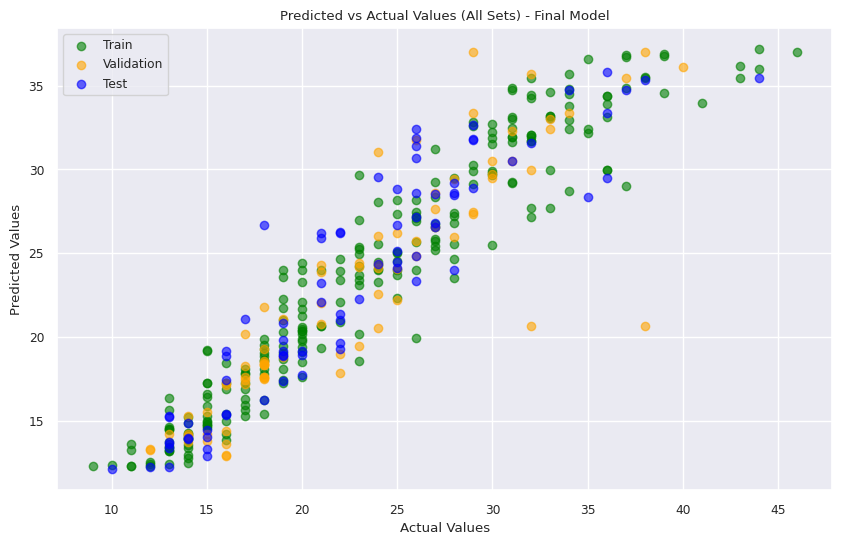

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_pred, color='green', alpha=0.6, label='Train')
plt.scatter(y_val, val_pred, color='orange', alpha=0.6, label='Validation')
plt.scatter(y_test, test_pred, color='blue', alpha=0.6, label='Test')
plt.title("Predicted vs Actual Values (All Sets) - Final Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)


plt.show()
